In [30]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats, signal

plt.style.use('seaborn')

### 1) 

Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?

In [2]:
# rolling sevens is more probable

# snake eyes: probability of 1 AND 1
prob_1 = (1/6) * (1/6)

# sevens: six combinations will give you a sum of seven [(1,6), (2,5), (3,4), (4,3), (5,2), (6,1)]
# probability of X AND Y, 6 times
prob_2 = (1/6)*(1/6)*6

print(prob_1, prob_2)

0.027777777777777776 0.16666666666666666


### 2)

Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram)

In [33]:
# Numerically

# all values of a dice roll have a probability of 1/6
sums = np.arange(2, 13, 1)
dice_prob = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
conv = np.convolve(dice_prob, dice_prob)
print(conv)

[0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

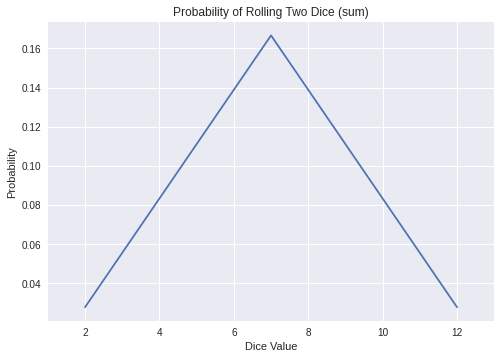

In [304]:
fig, ax = plt.subplots(1,1)
ax.plot(sums, conv)

ax.set_xlim(1, 13)
ax.set_xlabel("Dice Value")
ax.set_ylabel("Probability")
ax.set_title("Probability of Rolling Two Dice (sum)")

plt.show()

In [5]:
# Analytically

prob_2 = (1/6)*(1/6)
prob_3 = (1/6)*(1/6)*2
prob_4 = (1/6)*(1/6)*3
prob_5 = (1/6)*(1/6)*4
prob_6 = (1/6)*(1/6)*5
prob_7 = (1/6)*(1/6)*6
prob_8 = (1/6)*(1/6)*5
prob_9 = (1/6)*(1/6)*4
prob_10 = (1/6)*(1/6)*3
prob_11 = (1/6)*(1/6)*2
prob_12 = (1/6)*(1/6)

prob_sum = np.array([prob_2, prob_3, prob_4, prob_5, prob_6, prob_7, prob_8, prob_9, prob_10, prob_11, prob_12])
print(prob_sum)

[0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


### 3)

Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.

In [8]:
# mean: the sum of each value multiplied by its probability
mean = conv@sums

# variance: the square of the sums mulitiplied by their probability minus the mean squared

squares = sums**2@conv
variance = squares - mean**2

print(mean, variance)

7.0 5.833333333333336


#### 4)

Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.

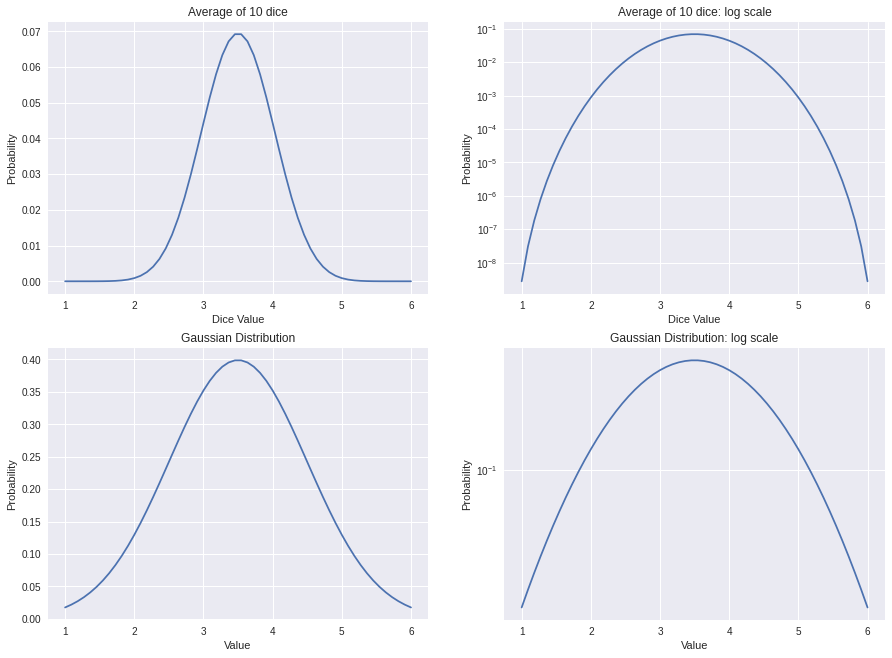

In [307]:
convolutions = 10

dice_prob = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
dice_prob = dice_prob / np.sum(dice_prob)
final = dice_prob

for i in range(convolutions):
    final = np.convolve(dice_prob, final)
    
x = np.linspace(1, 6, len(final))

fig, ax = plt.subplots(2,2, figsize=[15,11])

ax[0,0].plot(x, final)
ax[0,0].set_xlabel("Dice Value")
ax[0,0].set_ylabel("Probability")
ax[0,0].set_title("Average of 10 dice")

ax[0,1].semilogy(x, final)
ax[0,1].set_xlabel("Dice Value")
ax[0,1].set_ylabel("Probability")
ax[0,1].set_title("Average of 10 dice: log scale")

ax[1,0].plot(x, stats.norm.pdf(x, loc=3.5, scale=1))
ax[1,0].set_xlabel("Value")
ax[1,0].set_ylabel("Probability")
ax[1,0].set_title("Gaussian Distribution")

ax[1,1].semilogy(x, stats.norm.pdf(x, loc=3.5, scale=1))
ax[1,1].set_xlabel("Value")
ax[1,1].set_ylabel("Probability")
ax[1,1].set_title("Gaussian Distribution: log scale")

plt.show()

This distribution is not quite Gaussian, but it's close. The linear-scaled plots look very similar, though they have different widths. The log-scaled plots show the discrepancy better; the average is less parabolic and more circular. Upon further convolutions the average plot of the dice rolls would better approach a Gaussian distribution.

### 5) 

Show that the sum and average of an initially Gaussian distribution is also a Gaussian. How does the standard deviation of the resulting sum or average Gaussian change? This is a *hugely* important result. Explore what this means for integrating a signal over time.

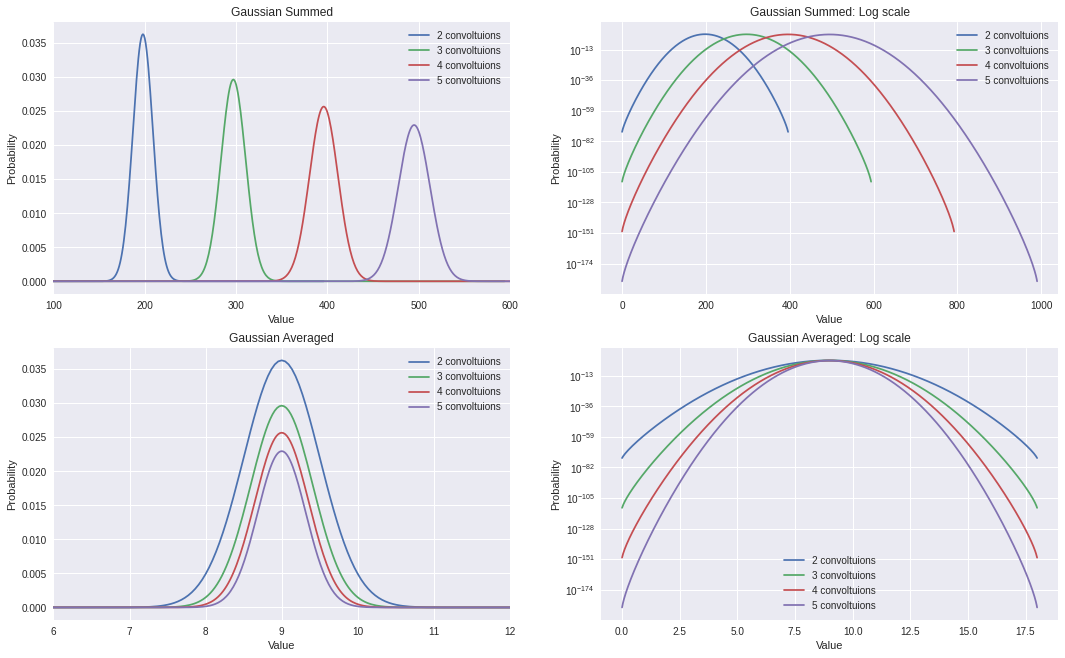

In [291]:
x = np.linspace(0, 18, 100)
y = stats.norm.pdf(x, loc=9, scale=1) 
y = y / np.sum(y)

orig = np.convolve(y, y)
final = orig
x1 = np.linspace(0, 18, len(orig))

fig, ax = plt.subplots(2,2, figsize=(18, 11))

convolutions = 4

for i in range(convolutions):
    final = np.convolve(final, orig)
    x_final = np.arange(0, len(final), 1)
    x_final_average = np.linspace(0, 18, len(final))
    
    ax[0,0].plot(x_final, final, label=str(i+2)+' convoltuions')
    ax[0,1].semilogy(x_final, final, label=str(i+2)+' convoltuions')
    ax[1,0].plot(x_final_average, final, label=str(i+2)+' convoltuions')
    ax[1,1].semilogy(x_final_average, final, label=str(i+2)+' convoltuions')
    
ax[0,0].legend(loc=0)
ax[0,0].set_xlabel("Value")
ax[0,0].set_ylabel("Probability")
ax[0,0].set_title("Gaussian Summed")
ax[0,0].set_xlim([100, 600])

ax[0,1].legend(loc=0)
ax[0,1].set_xlabel("Value")
ax[0,1].set_ylabel("Probability")
ax[0,1].set_title("Gaussian Summed: Log scale")

ax[1,0].legend(loc=0)
ax[1,0].set_xlabel("Value")
ax[1,0].set_ylabel("Probability")
ax[1,0].set_title("Gaussian Averaged")
ax[1,0].set_xlim([6, 12])

ax[1,1].legend(loc=0)
ax[1,1].set_xlabel("Value")
ax[1,1].set_ylabel("Probability")
ax[1,1].set_title("Gaussian Averaged: Log scale")

plt.show()

In [300]:
# Standard deviation of the resulting sum Gaussian

# original
mean = y@x
squares = x**2@y
orig_stdv = np.sqrt(squares - mean**2)

# final
mean = final@x_final
squares = x_final**2@final
fin_stdv = np.sqrt(squares - mean**2)

print(orig_stdv, fin_stdv)

1.0 17.392527130926087


In [301]:
# Standard deviation of the resulting averaged Gaussian

# original
mean = y@x
squares = x**2@y
orig_stdv = np.sqrt(squares - mean**2)

# final
mean = final@x_final_average
squares = x_final_average**2@final
fin_stdv = np.sqrt(squares - mean**2)

print(orig_stdv, fin_stdv)

1.0 0.31622776601682895


Summing a data set over time **increases** the standard deviation, while averaging a data set over time **decreases** the standard deviation. If more of the data is further from the mean (larger standard deviation, sum), a 'high sigma' or 'rare' measurement is more likely. Conversely, if less of the data is further from the mean (smaller standard deviation, average), a 'low sigma' or 'rare' measurement is more likely.